# Problem Statement:

BoomBikes, a US-based bike-sharing provider, has faced substantial revenue declines amid the ongoing COVID-19 pandemic. The company is grappling with sustainability challenges in the current market conditions. In an effort to revitalize its business, BoomBikes aims to anticipate the demand for shared bikes once the quarantine situation subsides nationwide. The goal is to proactively position themselves to meet heightened demand, distinguish their services in the market, and generate significant profits.

### Objectives:

Identify the key variables that significantly influence the prediction of bike demand.
Assess the effectiveness of these variables in describing and predicting the demand for shared bikes.

### Goal:

Develop a predictive model that identifies the significant variables influencing bike demand. This model will serve as a valuable tool for the management to comprehend the factors driving demand and strategically manipulate business tactics. The ultimate aim is to align services with anticipated demand levels and exceed customer expectations, thereby fostering profitability and sustained success.







# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score




# 1.Reading and understanding Data

In [2]:
data=pd.read_csv("day.csv")

In [3]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# 2.Processing and labeling data for better readability and understanding

In [6]:
#dropping unnecessary columns
unnecessary_col=['dteday','casual','registered','instant']
data=data.drop(columns=unnecessary_col,axis=1)
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [7]:
#checking number of unique values in each specified column.
num_encoded_col=['season','weathersit','mnth','weekday']
unique_values = data[num_encoded_col].nunique()
unique_values

season         4
weathersit     3
mnth          12
weekday        7
dtype: int64

In [8]:
#converting numerical value into categorical value
data['season']=data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data['weathersit']=data['weathersit'].map({1:'clear', 2:'mist', 3:'light_snow', 4:'heavy_rain'})
data['mnth']=data['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
data['weekday']=data['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [9]:
data.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349


# 3.Data Visualisation

In [10]:
cat_columns=['season','weathersit','mnth','weekday']
num_columns=['temp','hum','windspeed','cnt']

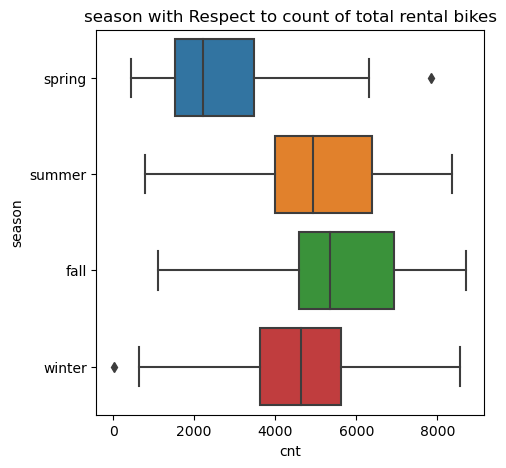

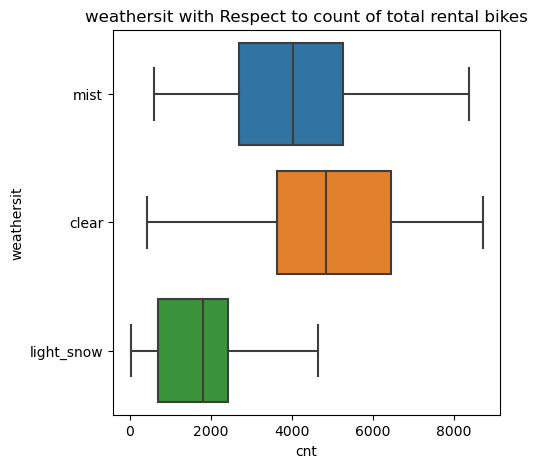

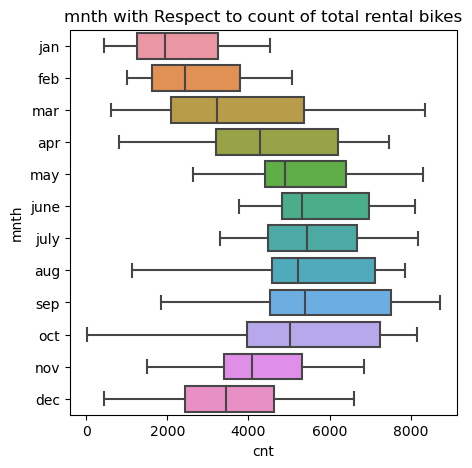

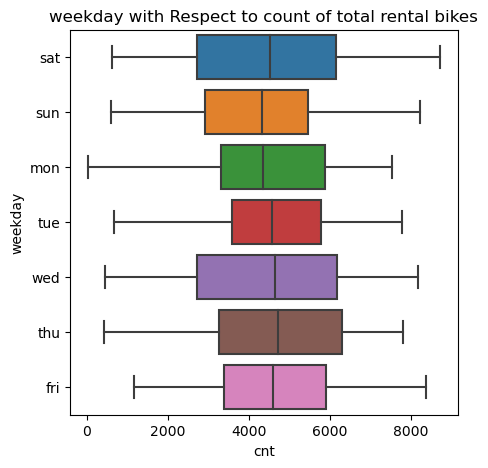

In [11]:
#box plot for categorical columns
for col in cat_columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x='cnt', y=col, data=data)
    plt.title(f'{col} with Respect to count of total rental bikes')
    plt.xlabel('cnt')
    plt.ylabel(col)
    plt.show()

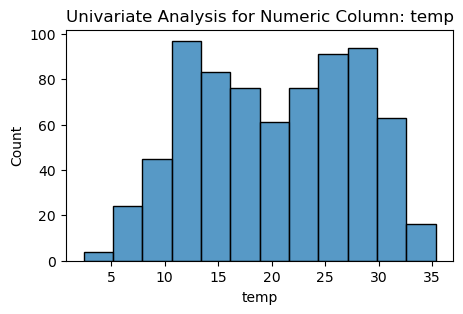

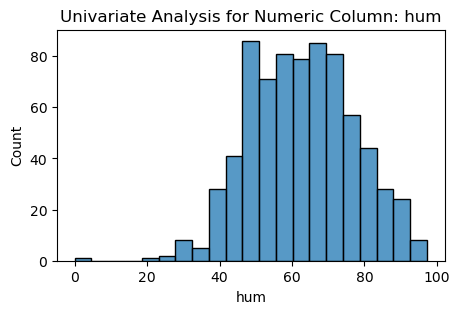

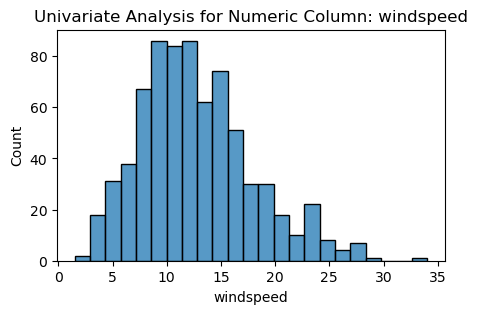

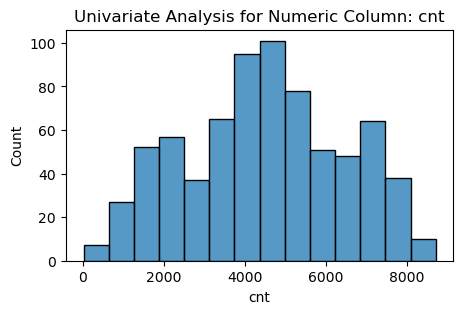

In [12]:
#distribution of numeric columns
for col in num_columns:
    plt.figure(figsize=(5,3))
    sns.histplot(data=data[col])
    plt.title(f'Univariate Analysis for Numeric Column: {col}')
    plt.show()
    

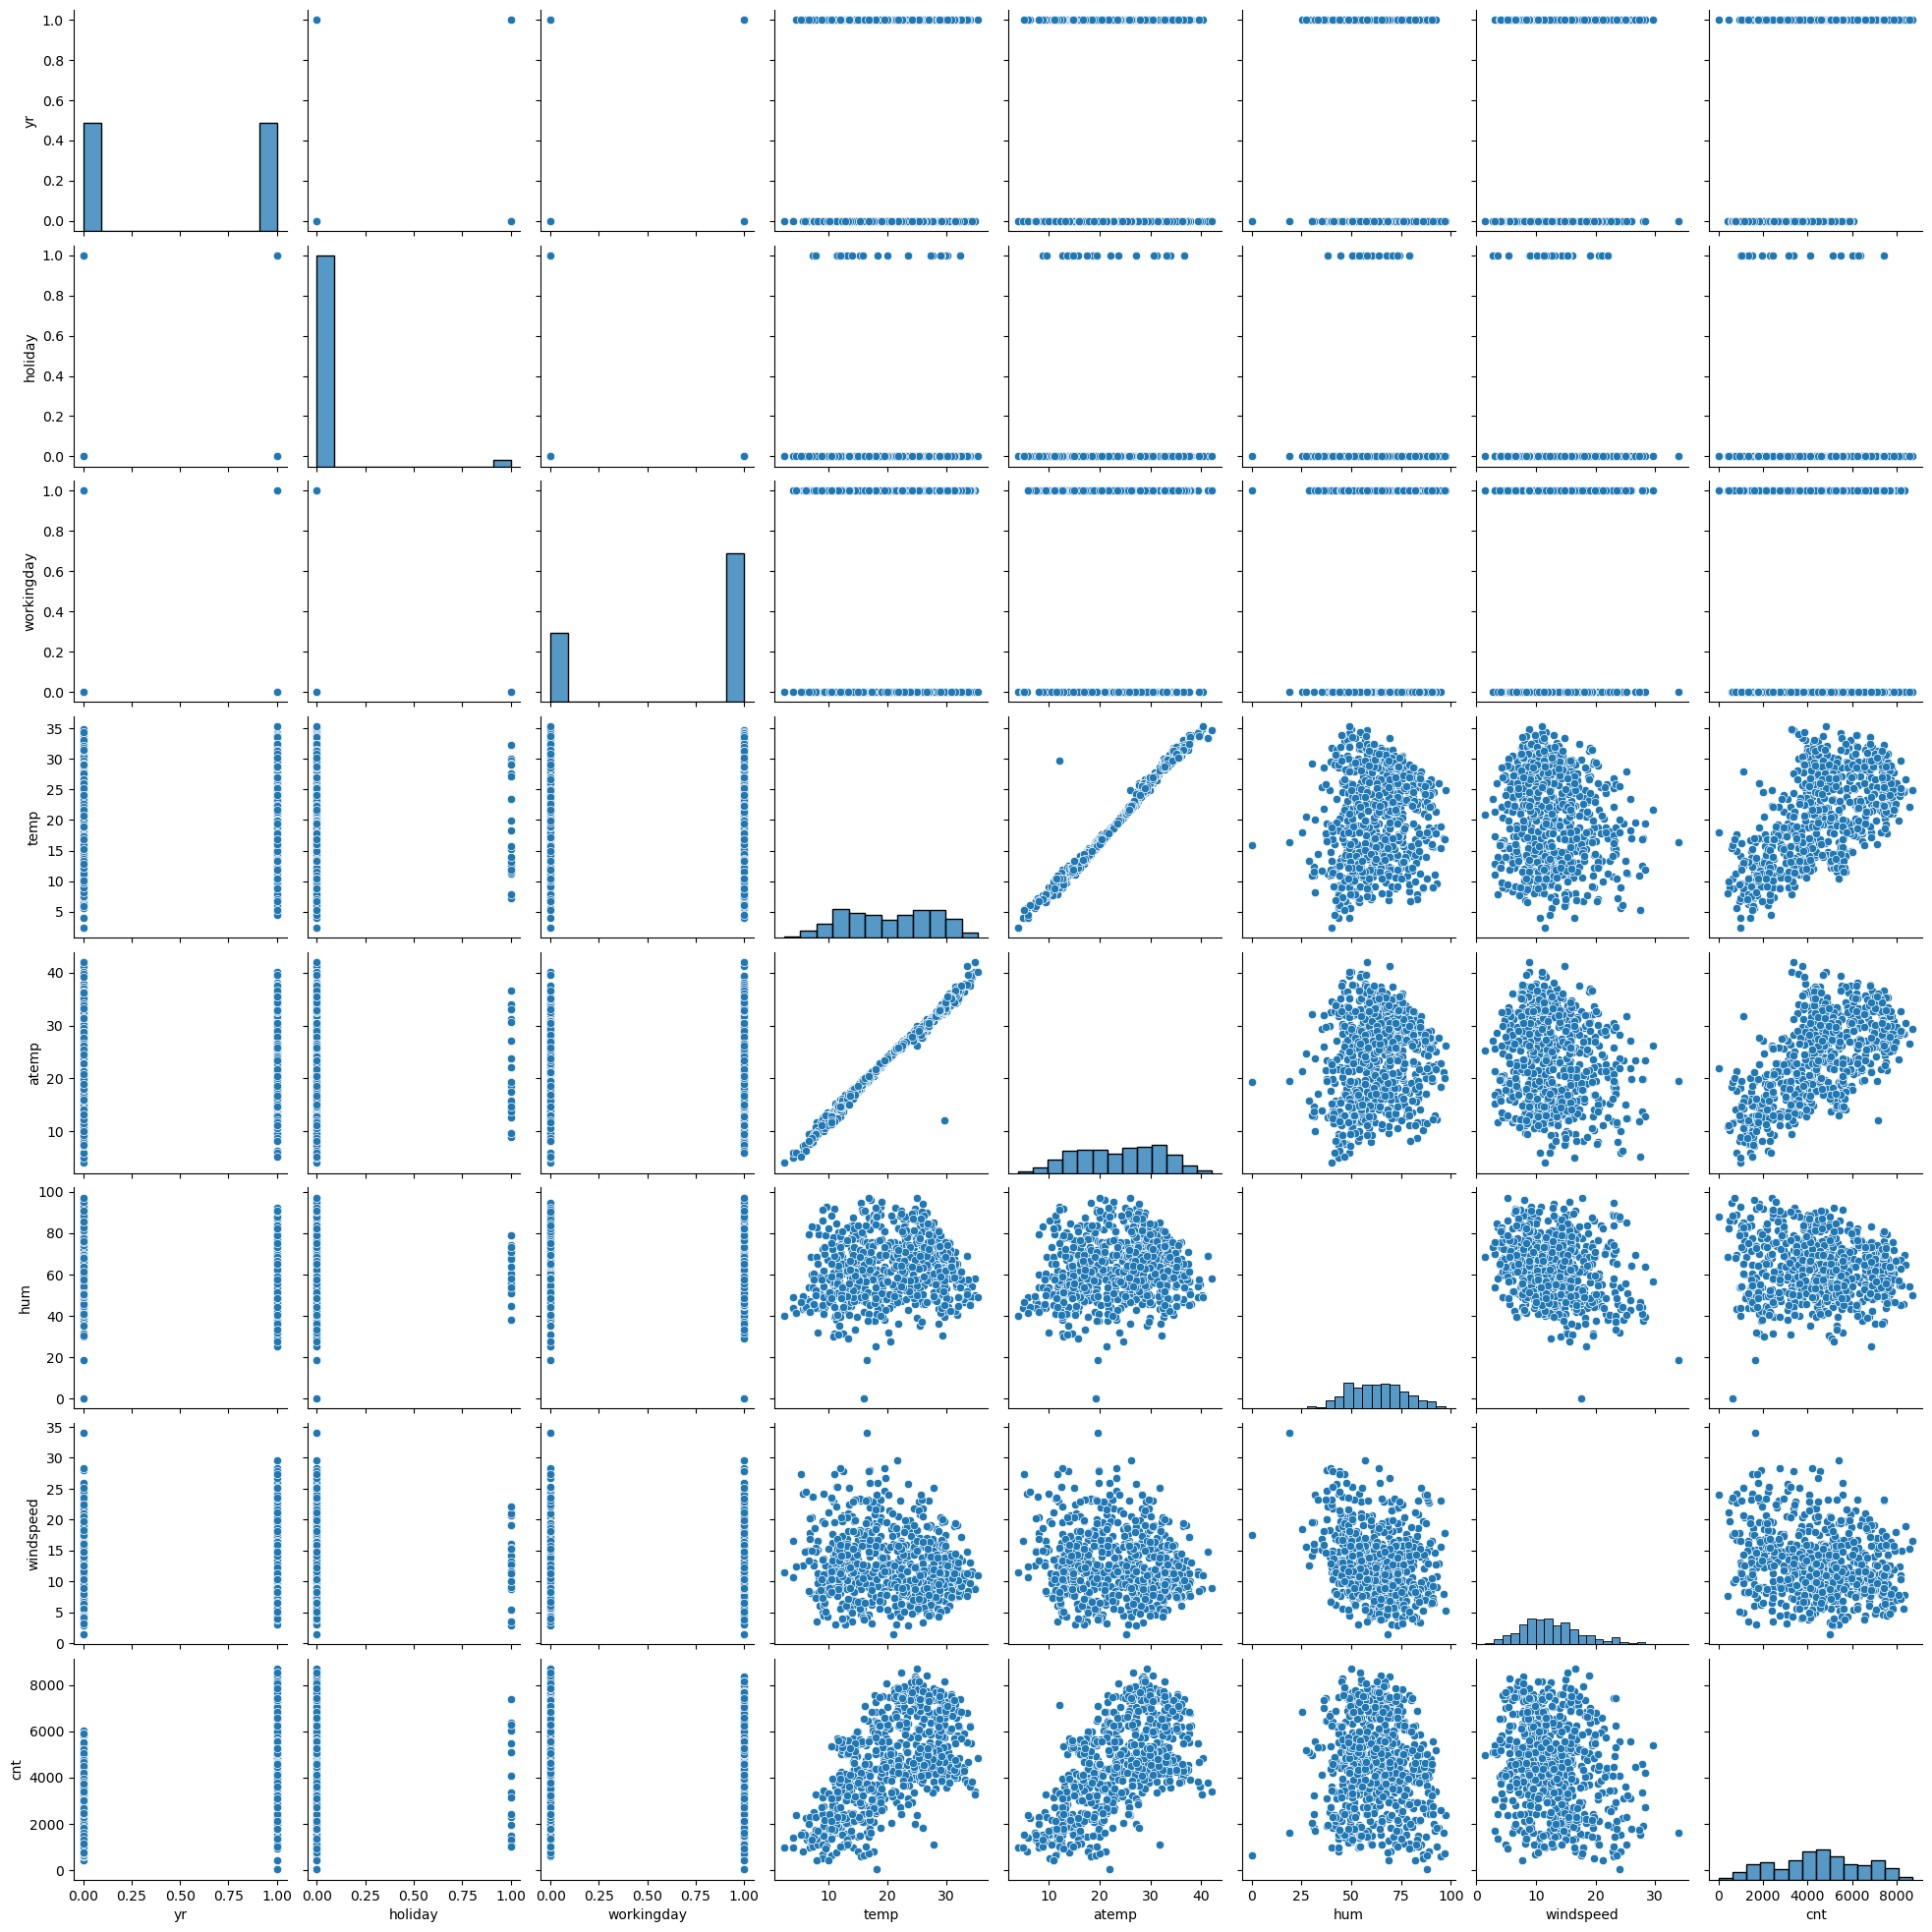

In [13]:
#scatterplot
sns.pairplot(data=data)

<Axes: >

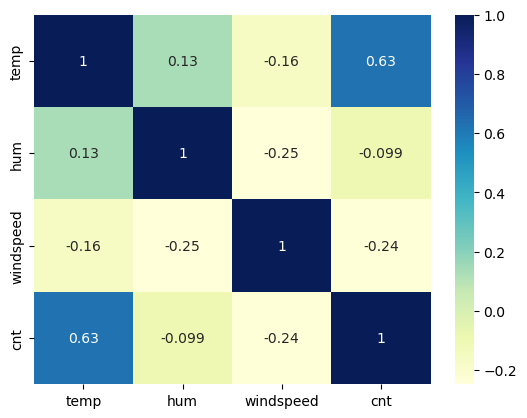

In [14]:
sns.heatmap(data[num_columns].corr(), annot = True, cmap= 'YlGnBu')

In [15]:
#We would drop atemp since it is collinear to temp
data=data.drop(['atemp'],axis=1)

# 4.Data Prepration

In [16]:
#Creating dummy variables
data=pd.get_dummies(data=data,columns=['season','weathersit','mnth','weekday'],drop_first=True,dtype='int')
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_light_snow', 'weathersit_mist', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [17]:
#test train split
df_train,df_test=train_test_split(data,train_size=0.8,test_size=0.2,random_state=1)
print(f"train:{df_train.shape}")
print(f"test:{df_test.shape}")

train:(584, 29)
test:(146, 29)


In [18]:
#normalizing data
scale=MinMaxScaler()
df_train[num_columns]=scale.fit_transform(df_train[num_columns])
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.501712,0.030822,0.683219,0.551777,0.646070,0.346197,0.520700,0.231164,0.261986,0.243151,...,0.087329,0.092466,0.078767,0.083904,0.150685,0.133562,0.152397,0.136986,0.135274,0.143836
std,0.500426,0.172983,0.465620,0.225512,0.146303,0.163550,0.219682,0.421939,0.440092,0.429353,...,0.282558,0.289931,0.269606,0.277482,0.358048,0.340472,0.359714,0.344128,0.342309,0.351224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.360101,0.537168,0.230777,0.379372,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.560248,0.644816,0.319885,0.523182,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.744819,0.752357,0.440056,0.678469,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#dividing variables into x and y set
y_train=df_train['cnt']
x_train=df_train.drop(['cnt'],axis=1)
print(f"target:{y_train.shape}")
print(f"features:{x_train.shape}")

target:(584,)
features:(584, 28)


In [20]:
df_train.shape

(584, 29)

# 5.Feature selection and Model Building

In [21]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [22]:

lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
rfe=RFE(lin_reg,n_features_to_select=15)
rfe=rfe.fit(x_train,y_train)
rfe_df = pd.DataFrame({'Predictor': x_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')


,Predictor,Select Status,Ranking
0,yr,True,1
1,holiday,True,1
2,workingday,True,1
3,temp,True,1
4,hum,True,1
5,windspeed,True,1
6,season_spring,True,1
17,mnth_mar,True,1
8,season_winter,True,1
9,weathersit_light_snow,True,1


In [23]:
#selecting columns
col = x_train.columns[rfe.support_]
x_train_rfe = x_train[col]
x_train_rfe.head()


,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,weathersit_light_snow,mnth_july,mnth_mar,mnth_nov,mnth_sep,weekday_sat,weekday_sun
68,0,0,1,0.411147,0.000000,0.493712,1,0,1,0,1,0,0,0,0
76,0,0,1,0.599187,0.540069,0.430092,1,0,0,0,1,0,0,0,0
615,1,0,0,0.747675,0.821766,0.533349,0,0,0,0,0,0,1,1,0
713,1,0,0,0.330249,0.668809,0.173084,0,1,0,0,0,0,0,1,0
139,0,0,1,0.595034,0.739931,0.211559,0,0,0,0,0,0,0,0,0


In [24]:
#initial VIF score
calculateVIF(x_train_rfe)

,Features,VIF
2,workingday,43.80
14,weekday_sun,10.55
13,weekday_sat,9.14
3,temp,3.06
1,holiday,3.02
6,season_spring,2.67
7,season_winter,2.11
11,mnth_nov,1.55
9,mnth_july,1.38
4,hum,1.29


### Building Model and validating features performance through p value

In [25]:
#Model 1

x_train_sm_1=sm.add_constant(x_train_rfe)
lm1=sm.OLS(y_train,x_train_sm_1)
lm_model1=lm1.fit()
lm_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          1.23e-203
Time:                        02:58:06   Log-Likelihood:                 563.40
No. Observations:                 584   AIC:                            -1097.
Df Residuals:                     569   BIC:                            -1031.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3076      0.025     12.262      0.000       0.258       0.357
yr                        0.2296      0.008     29.328      0.000       0.214       0.245
holiday                   0.0205      0.019      1.068      0.286      -0.017       0.058
workingday                0.0991      0.009     11.091      0.000       0.082       0.117
temp                      0.4733      0.030     15.779      0.000       0.414       0.532
hum                      -0.2638      0.030     -8.799      0.000      -0.323      -0.205
windspeed                -0.1925      0.026     -7.494      0.000      -0.243      -0.142
season_spring            -0.1295      0.015     -8.650      0.000      -0.159      -0.100
season_winter             0.0648      0.013      4.949      0.000       0.039       0.091
weathersit_light_snow    -0.1968      0.024     -8.047      0.000      -0.245      -0.149
mnth_july                -0.0726      0.016     -4.634      0.000      -0.103      -0.042
mnth_mar                  0.0466      0.015      3.058      0.002       0.017       0.077
mnth_nov                 -0.0335      0.017     -2.021      0.044      -0.066      -0.001
mnth_sep                  0.0635      0.015      4.294      0.000       0.034       0.093
weekday_sat               0.1247      0.011     10.992      0.000       0.102       0.147
weekday_sun               0.0633      0.011      5.654      0.000       0.041       0.085
==============================================================================
Omnibus:                       76.223   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.219
Skew:                          -0.785   Prob(JB):                     3.56e-31
Kurtosis:                       4.815   Cond. No.                     5.56e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.3e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

###### here we observe p value of holiday is significantly high and vif score is also infinite so it can be dropped

In [26]:
#Dropping "holiday" column
x_train_elimination= x_train_rfe.drop(['workingday'], axis = 1)

In [27]:
#updated vif score
calculateVIF(x_train_elimination)

,Features,VIF
3,hum,15.07
2,temp,13.85
4,windspeed,5.00
5,season_spring,2.50
6,season_winter,2.50
0,yr,2.00
10,mnth_nov,1.67
8,mnth_july,1.51
13,weekday_sun,1.23
11,mnth_sep,1.22


In [28]:
#Model2

x_train_sm_2=sm.add_constant(x_train_elimination)
lm2=sm.OLS(y_train,x_train_sm_2)
lm_model2=lm2.fit()
lm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          1.23e-203
Time:                        02:58:06   Log-Likelihood:                 563.40
No. Observations:                 584   AIC:                            -1097.
Df Residuals:                     569   BIC:                            -1031.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4067      0.031     13.139      0.000       0.346       0.467
yr                        0.2296      0.008     29.328      0.000       0.214       0.245
holiday                  -0.0786      0.023     -3.458      0.001      -0.123      -0.034
temp                      0.4733      0.030     15.779      0.000       0.414       0.532
hum                      -0.2638      0.030     -8.799      0.000      -0.323      -0.205
windspeed                -0.1925      0.026     -7.494      0.000      -0.243      -0.142
season_spring            -0.1295      0.015     -8.650      0.000      -0.159      -0.100
season_winter             0.0648      0.013      4.949      0.000       0.039       0.091
weathersit_light_snow    -0.1968      0.024     -8.047      0.000      -0.245      -0.149
mnth_july                -0.0726      0.016     -4.634      0.000      -0.103      -0.042
mnth_mar                  0.0466      0.015      3.058      0.002       0.017       0.077
mnth_nov                 -0.0335      0.017     -2.021      0.044      -0.066      -0.001
mnth_sep                  0.0635      0.015      4.294      0.000       0.034       0.093
weekday_sat               0.0256      0.012      2.201      0.028       0.003       0.048
weekday_sun              -0.0359      0.011     -3.260      0.001      -0.057      -0.014
==============================================================================
Omnibus:                       76.223   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.219
Skew:                          -0.785   Prob(JB):                     3.56e-31
Kurtosis:                       4.815   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Vif score of humidity variable is high so it can be dropped

In [29]:
#dropping "hum" column
x_train_elimination= x_train_elimination.drop(['hum'], axis = 1)

In [30]:
#updated VIF
calculateVIF(x_train_elimination)

,Features,VIF
2,temp,5.19
3,windspeed,4.97
0,yr,2.00
5,season_winter,1.98
4,season_spring,1.77
9,mnth_nov,1.67
7,mnth_july,1.44
12,weekday_sun,1.22
10,mnth_sep,1.21
8,mnth_mar,1.20


In [31]:
#Model3

x_train_sm_3=sm.add_constant(x_train_elimination)
lm3=sm.OLS(y_train,x_train_sm_3)
lm_model3=lm3.fit()
lm_model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     174.8
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          4.41e-189
Time:                        02:58:07   Log-Likelihood:                 526.15
No. Observations:                 584   AIC:                            -1024.
Df Residuals:                     570   BIC:                            -963.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2283      0.025      9.166      0.000       0.179       0.277
yr                        0.2381      0.008     28.782      0.000       0.222       0.254
holiday                  -0.0769      0.024     -3.179      0.002      -0.124      -0.029
temp                      0.4491      0.032     14.117      0.000       0.387       0.512
windspeed                -0.1332      0.026     -5.045      0.000      -0.185      -0.081
season_spring            -0.1294      0.016     -8.117      0.000      -0.161      -0.098
season_winter             0.0510      0.014      3.686      0.000       0.024       0.078
weathersit_light_snow    -0.2596      0.025    -10.423      0.000      -0.308      -0.211
mnth_july                -0.0579      0.017     -3.491      0.001      -0.091      -0.025
mnth_mar                  0.0495      0.016      3.046      0.002       0.018       0.081
mnth_nov                 -0.0238      0.018     -1.352      0.177      -0.058       0.011
mnth_sep                  0.0483      0.016      3.086      0.002       0.018       0.079
weekday_sat               0.0288      0.012      2.330      0.020       0.005       0.053
weekday_sun              -0.0361      0.012     -3.078      0.002      -0.059      -0.013
==============================================================================
Omnibus:                       77.090   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.966
Skew:                          -0.810   Prob(JB):                     2.99e-30
Kurtosis:                       4.722   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### month november has high p value so it can be dropped

In [32]:
#Dropping 'mnth_nov'
x_train_elimination= x_train_elimination.drop(['mnth_nov'], axis = 1)

In [33]:
#Updated VIF
calculateVIF(x_train_elimination)

,Features,VIF
2,temp,5.15
3,windspeed,4.92
0,yr,2.00
4,season_spring,1.76
7,mnth_july,1.44
5,season_winter,1.37
11,weekday_sun,1.22
8,mnth_mar,1.20
9,mnth_sep,1.20
10,weekday_sat,1.19


In [34]:
#Model4

x_train_sm_4=sm.add_constant(x_train_elimination)
lm4=sm.OLS(y_train,x_train_sm_4)
lm_model4=lm4.fit()
lm_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     189.0
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          7.78e-190
Time:                        02:58:07   Log-Likelihood:                 525.22
No. Observations:                 584   AIC:                            -1024.
Df Residuals:                     571   BIC:                            -967.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2239      0.025      9.061      0.000       0.175       0.272
yr                        0.2381      0.008     28.758      0.000       0.222       0.254
holiday                  -0.0794      0.024     -3.288      0.001      -0.127      -0.032
temp                      0.4559      0.031     14.508      0.000       0.394       0.518
windspeed                -0.1344      0.026     -5.092      0.000      -0.186      -0.083
season_spring            -0.1265      0.016     -8.002      0.000      -0.158      -0.095
season_winter             0.0436      0.013      3.429      0.001       0.019       0.069
weathersit_light_snow    -0.2597      0.025    -10.423      0.000      -0.309      -0.211
mnth_july                -0.0590      0.017     -3.558      0.000      -0.092      -0.026
mnth_mar                  0.0496      0.016      3.055      0.002       0.018       0.082
mnth_sep                  0.0503      0.016      3.223      0.001       0.020       0.081
weekday_sat               0.0289      0.012      2.335      0.020       0.005       0.053
weekday_sun              -0.0357      0.012     -3.047      0.002      -0.059      -0.013
==============================================================================
Omnibus:                       72.742   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.963
Skew:                          -0.784   Prob(JB):                     1.21e-27
Kurtosis:                       4.624   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.


# 6.Residual Analysis

In [35]:
#checking the parameters of features
lm_model4.params

const                    0.223867
yr                       0.238056
holiday                 -0.079413
temp                     0.455927
windspeed               -0.134422
season_spring           -0.126487
season_winter            0.043631
weathersit_light_snow   -0.259734
mnth_july               -0.059033
mnth_mar                 0.049621
mnth_sep                 0.050270
weekday_sat              0.028915
weekday_sun             -0.035713
dtype: float64

In [36]:
y_train_pred = lm_model4.predict(x_train_sm_4)

Text(0.5, 0, 'Errors')

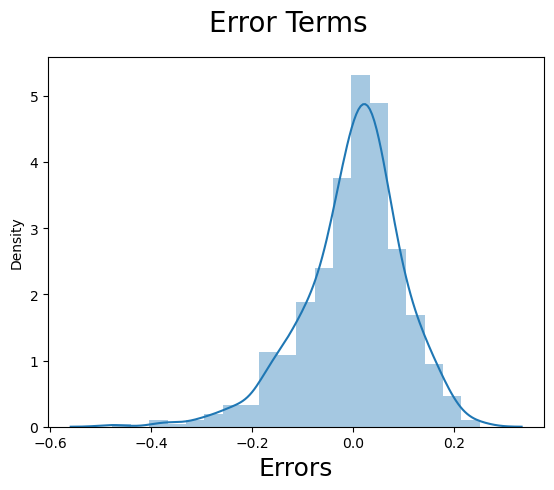

In [37]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

##### error terms are normally distributed

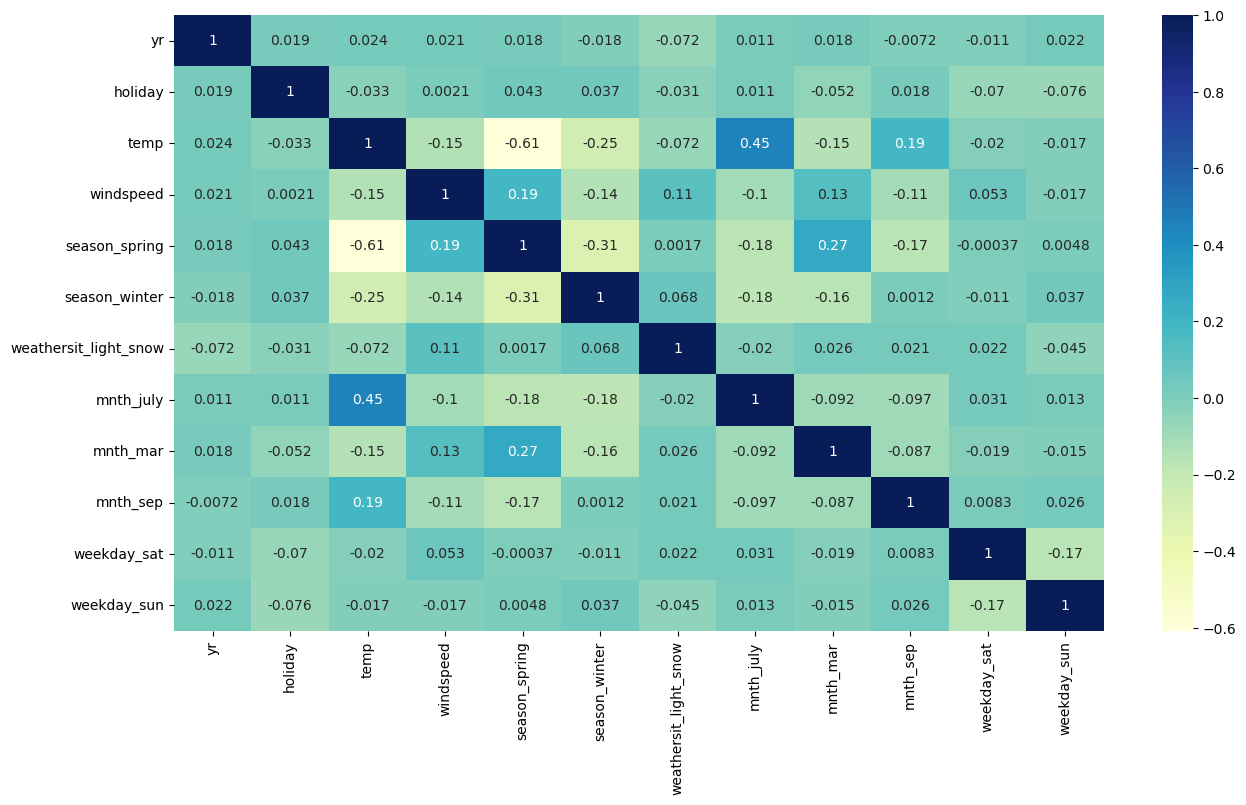

In [38]:
#checking for multicollinearity 

plt.figure(figsize=(15,8))
sns.heatmap(x_train_elimination.corr(),annot = True, cmap="YlGnBu")
plt.show()

##### no multicollinearity

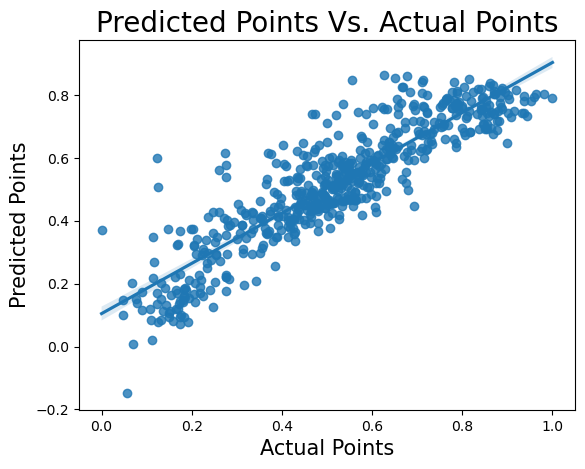

In [39]:
# Homoscedasticity

sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

# 7. Final Prediction using unseen data

In [40]:
#scaling test set

df_test[num_columns] = scale.transform(df_test[num_columns])
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.493151,0.020548,0.684932,0.512151,0.642723,0.348050,0.497739,0.308219,0.212329,0.246575,...,0.075342,0.041096,0.109589,0.075342,0.116438,0.184932,0.109589,0.164384,0.171233,0.130137
std,0.501674,0.142354,0.466142,0.236507,0.147269,0.144745,0.234434,0.463347,0.410364,0.432501,...,0.264852,0.199195,0.313452,0.264852,0.321854,0.389578,0.313452,0.371899,0.378009,0.337612
min,0.000000,0.000000,0.000000,0.047675,0.327335,0.050010,0.069604,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.297280,0.521082,0.246148,0.297803,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.505214,0.642245,0.335882,0.490681,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.749893,0.419240,0.702514,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.957426,0.976435,0.810267,0.928210,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
#dividing test data into x and y set
y_test=df_test['cnt']
x_test=df_test.drop(['cnt'],axis=1)
print(f"target:{y_test.shape}")
print(f"features:{x_test.shape}")

target:(146,)
features:(146, 28)


In [42]:
col=x_train_elimination.columns
x_test=x_test[col]

#adding a constant variable
x_test_new=sm.add_constant(x_test)

In [43]:
y_pred=lm_model4.predict(x_test_new)

##### r2 and adjusted r2

In [44]:
r2=r2_score(y_test,y_pred)
round(r2,4)

0.8286

Text(0, 0.5, 'y_pred')

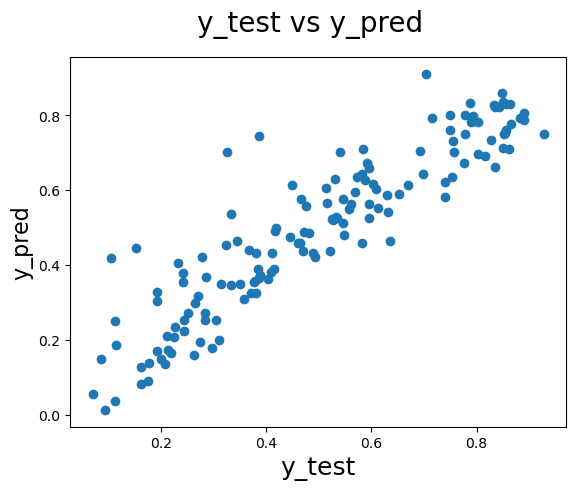

In [45]:

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [46]:

adjusted_r2 = round(1-(1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)

0.8131


# 8.Conclusion

##### Seasonal Impact:
Seasonal variables (spring and winter) have a noticeable effect on bike demand. Demand is slightly lower during spring, possibly due to weather conditions, while winter sees a slight increase in predicted demand.

##### Weather Sensitivity:
Variables related to weather conditions (temp and weathersit_light_snow) significantly influence bike demand. Warmer temperatures boost demand, while the presence of light snow has a substantial negative impact.

##### Yearly Growth: 
The positive coefficient for yr indicates a positive trend in demand over the years. BoomBikes may experience increased demand as time progresses, possibly due to growing awareness and popularity of bike-sharing services.

##### Holiday Effect: 
The negative coefficient for holiday suggests a minor decrease in predicted demand during holidays. This insight can help BoomBikes tailor their services or promotions during holiday seasons to maintain or boost demand.

##### Weekday and Monthly Variations: 
Specific weekdays (weekday_sun) and months (mnth_sep) impact demand differently. Adjusting strategies for Sundays and focusing on promotional activities in September may enhance BoomBikes' ability to meet demand fluctuations.






